# Import Libraries

In [2]:
import tensorflow as tf
import os
import datetime
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Read Dataset

In [3]:
dataset, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', with_info=True)
train_dataset = dataset['train']

Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incompleteFLX51F/amazon_us_reviews-train.tfrecord


Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [4]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [5]:
# number of records in the dataset
len(list(train_dataset))

104975

In [6]:
# how much data to pre fetch in memory(speeds up training)
BUFFER_SIZE = 40000

# batch size for mini batch SGD
BATCH_SIZE = 196

In [7]:
# shuffle the dataset so that in each buffer of 40K samples, you get both the target values
train_dataset = train_dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)

In [8]:
# print first 2 records of dataset
for row in train_dataset.take(2):
  print(row)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'46860133'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B004BGLWIS'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'618651124'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'Smile Case Hello Kitty White Hard Back Cover Case for iPod Touch 4 4G iTouch 4 4G (it4-Hard Back HK White)'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'Nice'>, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2014-07-16'>, 'review_headline': <tf.Tensor: shape=(), dtype=string, numpy=b'Three Stars'>, 'review_id': <tf.Tensor: shape=(), dtype=string, numpy=b'R3AXNL6LBRQ5IG'>, 'star_rating': <tf.Tensor: shape=(), dtype=int32, numpy=3>, 'total_votes': <tf.Tensor: shape=()

In [10]:
for row in train_dataset.take(10):
  row = row['data']

  print(row.get('review_body').numpy())

  print(row.get('star_rating'))
  print(tf.where(row.get('star_rating')>3,1,0).numpy()) # if rating>3 then 1(positive), else 0(negative)

  print('*'*100)

b'Nice'
tf.Tensor(3, shape=(), dtype=int32)
0
****************************************************************************************************
b'Pros: Good design, comfortable display, powerful OS, good touch screen.<br />Cons: A bit slow when read bog pdf.<br />Used it for nearly half a year, I really like it. The android OS is powerful so you can use most apps in the market.'
tf.Tensor(5, shape=(), dtype=int32)
1
****************************************************************************************************
b'I initially rated this five stars upon receiving the item but on my first use I realised it has a short. the cable has to b held at and angle for the phone to charge. very disappointed.'
tf.Tensor(2, shape=(), dtype=int32)
0
****************************************************************************************************
b'The charger does work but it takes F O R E V E R to charge. This charger is best for if you wanna charge the phone overnight while you sleep. Othe

# Encoding Reviews

In [12]:
# get the vocobulary from dataset
# There are 73738 unique words in dataset

tokenizer = tfds.deprecated.text.Tokenizer()
vocabulary_set = set()

for _, row in train_dataset.enumerate():
  row = row['data']
  review_tokens = tokenizer.tokenize(row.get('review_body').numpy())
  vocabulary_set.update(review_tokens)

vocab_size = len(vocabulary_set)
vocab_size

73738

In [14]:
# Assign an integer value to all the words in the vocabulary 
encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set, lowercase=True, strip_vocab=True)

In [16]:
for row in train_dataset.take(5):
  # print the original review
  row = row['data']
  print(row.get('review_body').numpy())

  # print the encoded review
  encoded_example = encoder.encode(row.get('review_body').numpy())
  print(encoded_example)

  print('*'*100)

b'Nice'
[62939]
****************************************************************************************************
b'Pros: Good design, comfortable display, powerful OS, good touch screen.<br />Cons: A bit slow when read bog pdf.<br />Used it for nearly half a year, I really like it. The android OS is powerful so you can use most apps in the market.'
[70410, 62559, 62498, 49330, 54123, 62918, 59193, 62559, 68074, 53253, 20180, 70039, 44738, 64713, 70603, 73040, 57176, 16219, 64880, 20180, 57971, 67237, 60443, 72517, 66312, 44738, 61215, 40478, 61846, 63906, 67237, 61273, 71680, 59193, 42494, 62918, 72967, 72911, 52298, 15787, 40187, 56001, 54460, 61273, 38417]
****************************************************************************************************
b'I initially rated this five stars upon receiving the item but on my first use I realised it has a short. the cable has to b held at and angle for the phone to charge. very disappointed.'
[40478, 66147, 22463, 70892, 54097, 685

In [17]:
# mapping - just in a more presentable format
for index in encoded_example:
  print('{} ----> {}'.format(index, encoder.decode([index])))

70892 ----> this
42494 ----> is
58562 ----> jus
68715 ----> perfect
60443 ----> for
61273 ----> the
44532 ----> atv
52298 ----> can
64843 ----> be
54715 ----> fixed
31189 ----> easily
63280 ----> to
61273 ----> the
63281 ----> handle
66078 ----> bar
40569 ----> fits
61273 ----> the
34167 ----> gps
61389 ----> garin
54249 ----> sumo
63488 ----> 220
71365 ----> properly


In [18]:
# save the encoded vocabulary
encoder.save_to_file("/tmp/sa_encoder.vocab")

In [23]:
# Now it's time to encode all the rows

def encode(text_tensor, label_tensor):
  encoded_text = encoder.encode(text_tensor.numpy())
  label = tf.where(label_tensor>3,1,0)
  return encoded_text, label

def encode_map_fn(tensor):
  
  text = tensor['data'].get('review_body')
  label = tensor['data'].get('star_rating') 

  encoded_text, label = tf.py_function(encode, 
                                       inp=[text, label], 
                                       Tout=(tf.int64, tf.int32))

  encoded_text.set_shape([None])
  label.set_shape([])

  return encoded_text, label

In [24]:
ar_encoded_data = train_dataset.map(encode_map_fn)

In [26]:
# print first 2 rows of encoded data
for col1, col2 in ar_encoded_data.take(2):
  print(col1)
  print(col2)
  print('*'*100)

tf.Tensor([62939], shape=(1,), dtype=int64)
tf.Tensor(0, shape=(), dtype=int32)
****************************************************************************************************
tf.Tensor(
[70410 62559 62498 49330 54123 62918 59193 62559 68074 53253 20180 70039
 44738 64713 70603 73040 57176 16219 64880 20180 57971 67237 60443 72517
 66312 44738 61215 40478 61846 63906 67237 61273 71680 59193 42494 62918
 72967 72911 52298 15787 40187 56001 54460 61273 38417], shape=(45,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)
****************************************************************************************************


# Train-test split

In [27]:
# Keep 14k rows for testing (80K rows for training)
TAKE_SIZE=14000

# take first 14k rows for testing
test_data = ar_encoded_data.take(TAKE_SIZE)
# apply variable padding - pad each batch of 128 records to maximum length review in that batch
test_data = test_data.padded_batch(BATCH_SIZE)

# take next 80k rows for training
train_data = ar_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
# apply variable padding - pad each batch of 128 records to maximum length review in that batch
train_data = train_data.padded_batch(BATCH_SIZE)

In [28]:
# 0 will also be in vocabulary because of padding
vocab_size += 1

In [30]:
# printing the 2nd row of 1st batch of test data
# Shape is (522,) because 1st batch had a sentence with max lenght of 522 words
sample_text, sample_labels = next(iter(test_data))

sample_text[1], sample_labels[1]

(<tf.Tensor: shape=(522,), dtype=int64, numpy=
 array([70410, 62559, 62498, 49330, 54123, 62918, 59193, 62559, 68074,
        53253, 20180, 70039, 44738, 64713, 70603, 73040, 57176, 16219,
        64880, 20180, 57971, 67237, 60443, 72517, 66312, 44738, 61215,
        40478, 61846, 63906, 67237, 61273, 71680, 59193, 42494, 62918,
        72967, 72911, 52298, 15787, 40187, 56001, 54460, 61273, 38417,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  

In [33]:
# [No. of positive reviews, No. of negative reviews] in first 10 batches of test data
for f0,f1 in test_data.take(10):
  print(tf.unique_with_counts(f1)[2].numpy())

[ 74 122]
[ 71 125]
[150  46]
[126  70]
[ 54 142]
[129  67]
[123  73]
[127  69]
[139  57]
[ 61 135]


# Model Development

In [34]:
model = tf.keras.Sequential()
################################ EMBEDDING LAYER #########################################
#input_dim = Size of the vocabulary, 
# output_dim = Dimension of the dense embedding.
model.add(tf.keras.layers.Embedding(vocab_size, 128))

################################ LSTM LAYERS #############################################
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))

################################ DENSE AND DROP-OUT LAYERS #################################
for units in [64, 32, 16]:
  model.add(tf.keras.layers.Dense(units, activation='relu'))
  model.add(tf.keras.layers.Dropout(units*0.006))

################################ OUTPUT LAYER #############################################
model.add(tf.keras.layers.Dense(1))

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         9438592   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         263168    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0

# Training

In [36]:
history=model.fit(train_data, epochs=6, validation_data=test_data)

Epoch 1/6
465/465 [==============================] - 349s 563ms/step - loss: 0.4458 - accuracy: 0.7618 - val_loss: 0.3080 - val_accuracy: 0.8545
Epoch 2/6
465/465 [==============================] - 318s 565ms/step - loss: 0.2614 - accuracy: 0.8962 - val_loss: 0.2749 - val_accuracy: 0.8721
Epoch 3/6
465/465 [==============================] - 319s 566ms/step - loss: 0.2074 - accuracy: 0.9198 - val_loss: 0.2763 - val_accuracy: 0.8879
Epoch 4/6
465/465 [==============================] - 321s 569ms/step - loss: 0.1721 - accuracy: 0.9349 - val_loss: 0.2900 - val_accuracy: 0.8766
Epoch 5/6
465/465 [==============================] - 326s 579ms/step - loss: 0.1488 - accuracy: 0.9444 - val_loss: 0.3383 - val_accuracy: 0.8689
Epoch 6/6
465/465 [==============================] - 327s 575ms/step - loss: 0.1254 - accuracy: 0.9539 - val_loss: 0.3260 - val_accuracy: 0.8704


In [38]:
# save the model
model.save('/tmp/final_sentiment_analysis.hdf5')

In [39]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

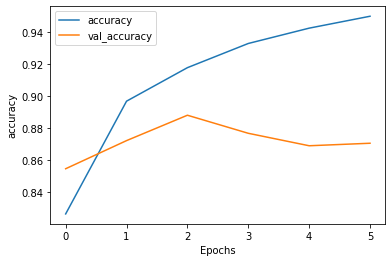

In [40]:
plot_graphs(history, 'accuracy')

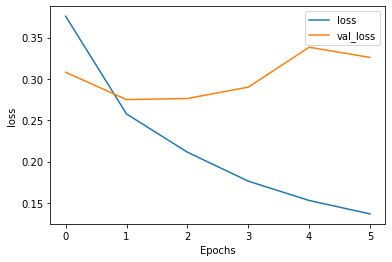

In [41]:
plot_graphs(history, 'loss')

# Testing

In [ ]:
# eval_loss, eval_acc = model.evaluate(test_data)
# print('\nEval loss: {:.3f}, Eval accuracy: {:.3f}'.format(eval_loss, eval_acc))

In [ ]:
# for f0,f1 in test_data.take(1):
#   print(f1)
#   print(model.predict(f0))

# Inference

In [44]:
# loading the model
tf.keras.backend.clear_session()
sa_load = tf.keras.models.load_model('/tmp/final_sentiment_analysis.hdf5',compile = False)

In [42]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [43]:
def predict_fn(pred_text):
  encoded_pred_text = encoder.encode(pred_text)
  print(encoded_pred_text)
  encoded_pred_text = pad_to_size(encoded_pred_text, 32)
  print(encoded_pred_text)
  encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
  predictions = sa_load.predict(tf.expand_dims(encoded_pred_text, 0))

  return (predictions)

In [45]:
pred_text = ('This watch is pretty bad. Color and dial looks pathetic.')
predictions = predict_fn(pred_text)
print(predictions)

[70892, 33482, 42494, 69477, 56847, 58883, 32631, 7439, 66667, 72713]
[70892, 33482, 42494, 69477, 56847, 58883, 32631, 7439, 66667, 72713, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-5.60905]]


In [46]:
pred_text = ('Color and dial does not look as advertised. Shipping was not any better as well')
predictions = predict_fn(pred_text)
print(predictions)

[58883, 32631, 7439, 68968, 66733, 16867, 67868, 60060, 54514, 68661, 66733, 59556, 35628, 67868, 39252]
[58883, 32631, 7439, 68968, 66733, 16867, 67868, 60060, 54514, 68661, 66733, 59556, 35628, 67868, 39252, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-5.259117]]


In [47]:
pred_text = ('Amazing product. Fast Delivery. Nice packing')
predictions = predict_fn(pred_text)
print(predictions)

[62548, 52145, 52920, 22458, 62939, 54716]
[62548, 52145, 52920, 22458, 62939, 54716, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[5.343912]]


In [48]:
pred_text = ('Nice product. Packing could have been better')
predictions = predict_fn(pred_text)
print(predictions)

[62939, 52145, 54716, 34514, 53722, 65009, 35628]
[62939, 52145, 54716, 34514, 53722, 65009, 35628, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[1.5852466]]
